In [1]:
from pathlib import Path
model_ckpt = Path("/rl_benchmark/real_robot/model_checkpoints/XArm_pretrained_ckpt") \

#model_ckpt /= "PlaceCubeInBowlXArm-v5/sac/10-nobbox-eepctl-tz8s4u1p-g90/models/model_1800000.ckpt"
#model_ckpt /= "PlaceCubeInBowlXArm-v7/drq-rgb/10-hcam-eepctl-tongzhou-g90-nohigh-ent0-rs01/models/model_200000.ckpt"
#model_ckpt /= "PlaceCubeInBowlXArm-v7/drq-rgb/0-hcam-rlay-cjit-cfgv2-ent0/models/model_200000.ckpt"
#model_ckpt /= "PlaceCubeInBowlXArm-v7/drq-rgb/10-hcam-rlay-cjit-hue05-randcam-cfgv2-ent0/models/model_100000.ckpt"
#model_ckpt /= "PlaceCubeInBowlXArm-v7/drq-rgb/10-hcam-rlay-cjit-hue05-randcam-cfgv2-ent0/models/model_1800000.ckpt"
#model_ckpt /= "PlaceCubeInBowlXArm-v7/drq-rgb/20-hcam-rlay-cjit-hue05-randcam-cfgv2-ent0/models/model_300000.ckpt"
#model_ckpt /= "PlaceCubeInBowlXArm-v7/drq-rgb/20-hcam-rlay-cjit-hue05-randcam-cfgv2-ent0/models/model_900000.ckpt"
#model_ckpt /= "PlaceCubeInBowlXArm-v8/drq-rgb/20-hcam-allimgaug-cfgv2-ent0-noqvel-1hz/models/model_800000.ckpt"
#model_ckpt /= "PlaceCubeInBowlXArm-v8/drq-rgb/10-hcam-allimgaug-cfgv2-ent0-noqvel/models/model_1000000.ckpt"
model_ckpt /= "PlaceCubeInBowlXArm-v8/drq-rgb/20-hcam-augv4-cfgv2-ent0-noqvel-1hz/models/model_600000.ckpt"

seed = int(str(model_ckpt).split('/')[-3].split('-')[0])
env_name = str(model_ckpt).split('/')[-5]

input("Please use the robot arm to set cube and bowl position in simulator:")
cube_pos = [0.4099, -0.2663, 0.02]
bowl_pos = [0.2101, -0.1964, 0.0245818]

env_name, seed, model_ckpt

('PlaceCubeInBowlXArm-v8',
 20,
 PosixPath('/rl_benchmark/real_robot/model_checkpoints/XArm_pretrained_ckpt/PlaceCubeInBowlXArm-v8/drq-rgb/20-hcam-augv4-cfgv2-ent0-noqvel-1hz/models/model_600000.ckpt'))

In [2]:
# cmdline args
args = [
    '/rl_benchmark/pyrl/configs/mfrl/drq/maniskill2/maniskill2_rgbd.py',
    '--eval',
    f"--seed={seed}", "--deterministic", "--gpu-ids", '1',
    "--init-only",  # Only init agent and return
    f"--resume-from={model_ckpt}",

    '--cfg-options',
    f"env_cfg.env_name={env_name}",
    "env_cfg.obs_mode=rgb",
    #"env_cfg.remove_obs_extra=cube_bbox,bowl_bbox",
    "env_cfg.control_mode=pd_ee_delta_pos",
    "env_cfg.horizon=50",
    "env_cfg.image_obs_mode=hand_front",
    "env_cfg.remove_agent_qvel_obs=True",
    "env_cfg.bg_mask_obs=True",
    
    "rollout_cfg.num_procs=1",
    "agent_cfg.actor_cfg.head_cfg.log_std_clip_tanh=True",
    "agent_cfg.actor_cfg.head_cfg.log_std_bound=-5,2",
    "agent_cfg.gamma=0.9",

    # Turn off wandb logger
    "train_cfg.exp_logger_cfg.type=tensorboard", "train_cfg.exp_logger_cfg._delete_=True",
]

import open3d as o3d
from pyrl.apis.run_rl import main
args, cfg, agent, rollout, evaluator, replay = main(args)

# agent = agent.eval()

print("Done")

torchsparse is not installed correctly!
No module named 'torchsparse'
Pointnet++ is not compiled
cannot import name 'ball_query_ext' from partially initialized module 'pyrl.utils.cpp_ops.ops_3d.ball_query' (most likely due to a circular import) (/usr/local/lib/python3.10/dist-packages/pyrl/utils/cpp_ops/ops_3d/ball_query/__init__.py)
Piontnet++ is not supported
cannot import name 'PointFPModule' from 'pyrl.networks.modules' (/usr/local/lib/python3.10/dist-packages/pyrl/networks/modules/__init__.py)
SparseConv is not supported
No module named 'torchsparse'


pyrl - (run_rl.py:214) - INFO - 2023-07-28,18:02:36 - Get 1 checkpoint ['/rl_benchmark/real_robot/model_checkpoints/XArm_pretrained_ckpt/PlaceCubeInBowlXArm-v8/drq-rgb/20-hcam-augv4-cfgv2-ent0-noqvel-1hz/models/model_600000.ckpt'].
pyrl - (run_rl.py:215) - INFO - 2023-07-28,18:02:36 - Check checkpoint ['/rl_benchmark/real_robot/model_checkpoints/XArm_pretrained_ckpt/PlaceCubeInBowlXArm-v8/drq-rgb/20-hcam-augv4-cfgv2-ent0-noqvel-1hz/models/model_600000.ckpt']!
PlaceCubeInBowlXArm-v8-eval - (run_rl.py:433) - INFO - 2023-07-28,18:02:37 - Extra arguments that replace the default setting from the config file.
PlaceCubeInBowlXArm-v8-eval - (run_rl.py:435) - INFO - 2023-07-28,18:02:37 - env_cfg.env_name PlaceCubeInBowlXArm-v8
PlaceCubeInBowlXArm-v8-eval - (run_rl.py:435) - INFO - 2023-07-28,18:02:37 - env_cfg.obs_mode rgb
PlaceCubeInBowlXArm-v8-eval - (run_rl.py:435) - INFO - 2023-07-28,18:02:37 - env_cfg.control_mode pd_ee_delta_pos
PlaceCubeInBowlXArm-v8-eval - (run_rl.py:435) - INFO - 2023

**Environment type** mani_skill2
SDK_VERSION: 1.11.6
[ENV] No successful init grasp pose found!
[ENV] Contact: actor0.name='link5', actor1.name='link1', sep = -2.044e-02, impulse_norm = 2.877e+01
[ENV] No successful init grasp pose found!


Evaluation-PlaceCubeInBowlXArm-v8-eval - (evaluation.py:108) - INFO - 2023-07-28,18:02:43 - Evaluation environments have seed in [378518883, 378518884)!
PlaceCubeInBowlXArm-v8-eval - (run_rl.py:491) - INFO - 2023-07-28,18:02:43 - Get obs shape!
PlaceCubeInBowlXArm-v8-eval - (run_rl.py:503) - INFO - 2023-07-28,18:02:43 - State shape:{'rgb': [6, 128, 128], 'state': 23, 'bg_mask': [2, 128, 128]}, action shape:4
PlaceCubeInBowlXArm-v8-eval - (run_rl.py:504) - INFO - 2023-07-28,18:02:43 - Environment has the continuous action space with dimension 4.
PlaceCubeInBowlXArm-v8-eval - (run_rl.py:516) - INFO - 2023-07-28,18:02:43 - Final agent config:
{'type': 'DrQ', 'batch_size': 256, 'gamma': 0.9, 'update_coeff': 0.005, 'alpha': 0.2, 'target_update_interval': 1, 'automatic_alpha_tuning': True, 'shared_backbone': True, 'detach_actor_feature': True, 'alpha_optim_cfg': {'type': 'Adam', 'lr': 0.0003}, 'actor_cfg': {'type': 'ContinuousActor', 'head_cfg': {'type': 'TanhGaussianHead', 'log_std_bound': 

Done


In [3]:
import real_robot.envs
import gym

env = gym.make("PlaceCubeInBowlRealXArm-v8", control_mode="pd_ee_delta_pos",
               obs_mode="rgbd", robot_action_scale=100)
env._max_episode_steps = 400
obs = env.reset()

# Simulated env
import mani_skill2.envs
import gym
import numpy as np
import torch
from mani_skill2.utils.common import flatten_state_dict
from pyrl.utils.data import GDict

env_sim = gym.make(env_name, control_mode="pd_ee_delta_pos", control_freq=1,
                   obs_mode="rgb", image_obs_mode="hand_front", remove_agent_qvel_obs=True,
                   bg_mask_obs=True)
env_sim._max_episode_steps = 200

obs = env_sim.reset(seed=22)

# Set to real world pose
from sapien.core import Pose
env_sim.cube.set_pose(Pose(cube_pos, env_sim.cube.pose.q))
env_sim.bowl.set_pose(Pose(bowl_pos, env_sim.bowl.pose.q))

# function to get scene meshes
from typing import Dict
import open3d as o3d
from mani_skill2.utils.trimesh_utils import get_actor_meshes, get_actor_visual_meshes, merge_meshes
def get_scene_visual_meshes(env, format="o3d") -> Dict[str, o3d.geometry.TriangleMesh]:
    scene_meshes = {}
    for art in env.get_articulations():
        meshes = []
        for link in art.get_links():
            mesh = merge_meshes(get_actor_visual_meshes(link))
            if mesh is not None:
                mesh.apply_transform(link.pose.to_transformation_matrix())
                meshes.append(mesh)
        scene_meshes[art.name] = merge_meshes(meshes)

    for actor in env.get_actors():
        mesh = merge_meshes(get_actor_meshes(actor))
        if mesh is not None:
            mesh.apply_transform(actor.pose.to_transformation_matrix())
            scene_meshes[actor.name] = mesh

    if format == "o3d":
        for name, mesh in scene_meshes.items():
            scene_meshes[name] = o3d.geometry.TriangleMesh(
                o3d.utility.Vector3dVector(mesh.vertices), 
                o3d.utility.Vector3iVector(mesh.faces)
            )
    return scene_meshes

# Render function
from collections import defaultdict
from mani_skill2.utils.camera import resize_obs_images
from real_robot.utils.camera import depth2xyz, transform_points

def render(env, env_sim):
    obs_dict = defaultdict(list)

    camera_params_dict = env.get_camera_params()
    camera_captures_dict = env.get_images()
    obs = resize_obs_images({"image": camera_captures_dict, "camera_param": camera_params_dict}, (128,128))
    for cam_name, img_dict in env.recent_camera_obs.items():
        obs_dict["camera_names"].append(cam_name)
        obs_dict["color_images"].append(img_dict["rgb"])
        if "depth" in img_dict:
            obs_dict["depth_images"].append(img_dict["depth"])
            
            camera_params = camera_params_dict[cam_name]
            depth_image = img_dict["depth"]
            depth_scale = 1000.0 if depth_image.dtype == np.uint16 else 1.0
            xyz_image = depth2xyz(depth_image,
                                  camera_params["intrinsic_cv"],
                                  depth_scale)
            xyz_image = transform_points(xyz_image,
                                         camera_params["cam2world_cv"])
            obs_dict["xyz_images"].append(xyz_image)

        # env_sim obs
        img_dict = env_sim.get_obs()["image"][cam_name]
        obs_dict["sim_color_images"].append((img_dict["Color"][..., :3] * 255.0).astype(np.uint8))
        if "Position" in img_dict:
            obs_dict["sim_depth_images"].append(-img_dict["Position"][..., [2]])
    
    # env_sim mesh
    scene_meshes = get_scene_visual_meshes(env_sim)
    for name, mesh in scene_meshes.items():
        obs_dict[f"env_sim/{name}_mesh"] = mesh

    env.visualizer.show_observation(**obs_dict)
    env.visualizer.render()

# Render sapien as well
import cv2
def render_step_fn():
    cv2.waitKey(1)
    env_sim.render("human")
env.visualizer.cv2_vis.render = render_step_fn

env.visualizer.o3d_vis.toggle_pause(True)
render(env, env_sim)

ROBOT_IP: 192.168.1.229, VERSION: v1.12.10, PROTOCOL: V1, DETAIL: 7,7,XS1304,AC1302,v1.12.10, TYPE1300: [1, 1]
change prot_flag to 3
************* GetErrorWarnCode, Status: 0 **************
* ErrorCode: 0, Info: Normal
* WarnCode: 0, Info: Normal
**************************************************
[motion_enable], xArm is not ready to move
[set_state], xArm is ready to move


realsense.py - (realsense.py:32) - INFO - 2023-07-28 18:02 - Found Intel RealSense D435 (S/N: 146322076186 FW: 5.15.0.2 on USB 3.2)
realsense.py - (realsense.py:32) - INFO - 2023-07-28 18:02 - Found Intel RealSense D435 (S/N: 146322072630 FW: 5.15.0.2 on USB 3.2)
realsense.py - (realsense.py:36) - INFO - 2023-07-28 18:02 - Found 2 devices
RSDevice - (realsense.py:126) - INFO - 2023-07-28 18:02 - Loaded "High Accuracy" preset for <RSDevice: Intel RealSense D435 (S/N: 146322072630)>
RSDevice - (realsense.py:75) - INFO - 2023-07-28 18:02 - Setting Depth "option.exposure" to 1500
RSDevice - (realsense.py:138) - INFO - 2023-07-28 18:02 - Started device <RSDevice: Intel RealSense D435 (S/N: 146322072630)> with 2 streams
RSDevice - (realsense.py:140) - INFO - 2023-07-28 18:02 - <pyrealsense2.[video_]stream_profile: Depth(0) 848x480 @ 30fps Z16>
RSDevice - (realsense.py:140) - INFO - 2023-07-28 18:02 - <pyrealsense2.[video_]stream_profile: Color(0) 848x480 @ 30fps RGB8>
RSDevice - (realsense.p

FEngine (64 bits) created at 0x562f1d069c90 (threading is enabled)
FEngine resolved backend: OpenGL
************* GetErrorWarnCode, Status: 0 **************
* ErrorCode: 0, Info: Normal
* WarnCode: 0, Info: Normal
**************************************************
[motion_enable], xArm is not ready to move
[set_state], xArm is ready to move
************* GetErrorWarnCode, Status: 0 **************
* ErrorCode: 0, Info: Normal
* WarnCode: 0, Info: Normal
**************************************************
[motion_enable], xArm is not ready to move
[set_state], xArm is ready to move


[2023-07-28 18:02:56.909] [svulkan2] [warning] A second renderer will share the same internal context with the first one. Arguments passed to constructor will be ignored.


[ENV] No successful init grasp pose found!
[ENV] Contact: actor0.name='link5', actor1.name='link1', sep = -2.044e-02, impulse_norm = 2.877e+01
[ENV] No successful init grasp pose found!
[Open3D WARNING] Using a shader with lighting but geometry has no normals.
[Open3D WARNING] Using a shader with lighting but geometry has no normals.
[Open3D WARNING] Using a shader with lighting but geometry has no normals.


In [31]:
import torch
import numpy as np
from mani_skill2.utils.common import flatten_state_dict
from pyrl.utils.data import GDict

env.visualizer.o3d_vis.toggle_pause(True)

obs = env.reset()
sim_obs = env_sim.reset()
# Set to real world pose
from sapien.core import Pose
env_sim.cube.set_pose(Pose(cube_pos, env_sim.cube.pose.q))
env_sim.bowl.set_pose(Pose(bowl_pos, env_sim.bowl.pose.q))
env_sim.agent.reset(env.agent.get_qpos())
while True:
    render(env, env_sim)
    # Reset sim qpos
    env_sim.agent.reset(env.agent.get_qpos())

    # real
    rgb = []
    for cam_name, cam_obs in obs["image"].items():
        rgb.append(cam_obs["rgb"])
    rgb = np.concatenate(rgb, axis=2)

    obs.pop("image")
    obs["extra"]["tcp_pose"] = obs["extra"]["tcp_pose"].reshape(-1)
    obs.pop("camera_param")
    obs["agent"].pop("qvel", None)  # remove_agent_qvel_obs=True
    action = agent(GDict({"rgb": rgb.transpose(2, 0, 1), "state": flatten_state_dict(obs).astype("float32")}).unsqueeze(0, wrapper=False)).cpu().numpy()[0]
    # rgb = obs['rgb'] # [C, H, W]
    # state = obs['state'].astype(np.float32)
    # action = agent(GDict({"rgb": rgb, "state": state}).unsqueeze(0, wrapper=False)).cpu().numpy()[0]

    obs, reward, done, info = env.step(action)
    print(f"Real: Stepping with action {action}")

    # sim
    sim_obs = env_sim.observation(env_sim.get_obs())
    rgb = []
    for cam_name, cam_obs in sim_obs["image"].items():
        rgb.append(cam_obs["rgb"])
    rgb = np.concatenate(rgb, axis=2)

    sim_obs.pop("image")
    sim_obs["extra"]["tcp_pose"] = sim_obs["extra"]["tcp_pose"].reshape(-1)
    sim_obs.pop("camera_param")
    action = agent(GDict({"rgb": rgb.transpose(2, 0, 1), "state": flatten_state_dict(sim_obs).astype("float32")}).unsqueeze(0, wrapper=False)).cpu().numpy()[0]

    sim_obs, _, _, _ = env_sim.step(action)

    # print("**REWARD", reward)
    # print("**DONE", done)
    # print("**INFO", info)
    print(f"Sim: Stepping with action {action}")
    print(f"Real TCP: {env.agent.get_tcp_pose()}\nSim TCP: {env_sim.tcp.pose}")
    if done:
        print("Success")
        break

************* GetErrorWarnCode, Status: 0 **************
* ErrorCode: 0, Info: Normal
* WarnCode: 0, Info: Normal
**************************************************
[motion_enable], xArm is not ready to move
[set_state], xArm is ready to move
[ENV] No successful init grasp pose found!
[ENV] No successful init grasp pose found!
[ENV] No successful init grasp pose found!
[Open3D WARNING] Using a shader with lighting but geometry has no normals.
[Open3D WARNING] Using a shader with lighting but geometry has no normals.
[Open3D WARNING] Using a shader with lighting but geometry has no normals.


XArm7 - (xarm.py:170) - INFO - 2023-07-28 18:17 - Setting action = array([ 24.10468,  36.38385, -56.61421,  60.09461], dtype=float32)


Real: Stepping with action [ 0.24105  0.36384 -0.56614 -0.83699]
Sim: Stepping with action [-0.92208 -0.74973  0.77691 -0.3332 ]
Real TCP: Pose([0.500233, 0.0240826, 0.243476], [2.57189e-05, -0.707144, -0.707069, 8.10441e-06])
Sim TCP: Pose([0.388915, -0.0921496, 0.109235], [-2.55071e-05, 0.707148, 0.707066, -6.85756e-06])
[Open3D WARNING] Using a shader with lighting but geometry has no normals.
[Open3D WARNING] Using a shader with lighting but geometry has no normals.
[Open3D WARNING] Using a shader with lighting but geometry has no normals.


XArm7 - (xarm.py:170) - INFO - 2023-07-28 18:17 - Setting action = array([ 15.92105,  39.76636,  24.68831, 555.46985], dtype=float32)


Real: Stepping with action [0.43591 0.45225 0.24689 0.31505]
Sim: Stepping with action [-0.66453 -0.98669  0.80087  0.23452]
Real TCP: Pose([0.54, 0.04, 0.218787], [2.57195e-05, -0.707144, -0.707069, 8.10382e-06])
Sim TCP: Pose([0.401628, -0.0423123, 0.163456], [-2.47508e-05, 0.707148, 0.707066, -6.72857e-06])
[Open3D WARNING] Using a shader with lighting but geometry has no normals.
[Open3D WARNING] Using a shader with lighting but geometry has no normals.
[Open3D WARNING] Using a shader with lighting but geometry has no normals.


XArm7 - (xarm.py:170) - INFO - 2023-07-28 18:17 - Setting action = array([ -0.00366, -25.59894,  39.0287 , 477.01602], dtype=float32)


Real: Stepping with action [ 0.42132 -0.25603  0.3903   0.1326 ]
Sim: Stepping with action [-0.97046 -0.92356  0.38223 -0.11675]
Real TCP: Pose([0.5144, 0.0400002, 0.17976], [2.57193e-05, -0.707144, -0.707069, 8.10404e-06])
Sim TCP: Pose([0.447702, -0.0569698, 0.1806], [-2.30707e-05, 0.707149, 0.707064, -5.37583e-06])
[Open3D WARNING] Using a shader with lighting but geometry has no normals.
[Open3D WARNING] Using a shader with lighting but geometry has no normals.
[Open3D WARNING] Using a shader with lighting but geometry has no normals.


XArm7 - (xarm.py:170) - INFO - 2023-07-28 18:18 - Setting action = array([ -0.00208, -19.93143, -10.51799, 778.25916], dtype=float32)


Real: Stepping with action [ 0.53035 -0.19937 -0.10517  0.83316]
Sim: Stepping with action [-0.97518 -0.96873  0.08778 -0.08254]
Real TCP: Pose([0.494469, 0.04, 0.190278], [2.58017e-05, -0.707144, -0.707069, 8.19021e-06])
Sim TCP: Pose([0.417591, -0.0574398, 0.170997], [-2.24635e-05, 0.707149, 0.707065, -4.42821e-06])
[Open3D WARNING] Using a shader with lighting but geometry has no normals.
[Open3D WARNING] Using a shader with lighting but geometry has no normals.
[Open3D WARNING] Using a shader with lighting but geometry has no normals.


XArm7 - (xarm.py:170) - INFO - 2023-07-28 18:18 - Setting action = array([ -0.004  , -28.06216,  41.18544, 829.70123], dtype=float32)


Real: Stepping with action [ 0.55085 -0.28068  0.41187  0.95279]
Sim: Stepping with action [-0.94176 -0.84756  0.53934 -0.88252]
Real TCP: Pose([0.466405, 0.04, 0.149095], [2.57208e-05, -0.707144, -0.707069, 8.10247e-06])
Sim TCP: Pose([0.409766, -0.0541, 0.136391], [-2.45161e-05, 0.707148, 0.707065, -6.02822e-06])
[Open3D WARNING] Using a shader with lighting but geometry has no normals.
[Open3D WARNING] Using a shader with lighting but geometry has no normals.
[Open3D WARNING] Using a shader with lighting but geometry has no normals.


XArm7 - (xarm.py:170) - INFO - 2023-07-28 18:18 - Setting action = array([ -0.00931, -66.96021,  87.44484, 847.0176 ], dtype=float32)


Real: Stepping with action [ 0.72975 -0.66968  0.87447  0.99306]
Sim: Stepping with action [-0.96529 -0.57904  0.23771 -0.0173 ]
Real TCP: Pose([0.39944, 0.04, 0.061653], [2.58013e-05, -0.707144, -0.707069, 8.19063e-06])
Sim TCP: Pose([0.408545, -0.0564383, 0.125351], [-2.37338e-05, 0.707148, 0.707065, -4.65382e-06])
[Open3D WARNING] Using a shader with lighting but geometry has no normals.
[Open3D WARNING] Using a shader with lighting but geometry has no normals.
[Open3D WARNING] Using a shader with lighting but geometry has no normals.


XArm7 - (xarm.py:170) - INFO - 2023-07-28 18:18 - Setting action = array([ -0.00665, -66.45447, -18.86349, 468.72614], dtype=float32)


Real: Stepping with action [ 0.50627 -0.6646  -0.18862  0.11332]
Sim: Stepping with action [-0.98937  0.0443  -0.4922  -0.77162]
Real TCP: Pose([0.332987, 0.04, 0.0805191], [2.57196e-05, -0.707144, -0.707069, 8.10371e-06])
Sim TCP: Pose([0.403863, -0.0588528, 0.110834], [-2.0951e-05, 0.707149, 0.707065, -1.96975e-06])
[Open3D WARNING] Using a shader with lighting but geometry has no normals.
[Open3D WARNING] Using a shader with lighting but geometry has no normals.
[Open3D WARNING] Using a shader with lighting but geometry has no normals.


XArm7 - (xarm.py:170) - INFO - 2023-07-28 18:18 - Setting action = array([ -8.08374, -92.2166 , -16.47497,  33.41132], dtype=float32)


Real: Stepping with action [-0.08084 -0.92217 -0.16475 -0.89904]
Sim: Stepping with action [-0.97371 -0.2029  -0.9696  -0.85435]
Real TCP: Pose([0.24077, 0.0319257, 0.0969983], [2.57194e-05, -0.707144, -0.707069, 8.10395e-06])
Sim TCP: Pose([0.312711, -0.0573027, 0.177414], [-1.92523e-05, 0.707148, 0.707065, -7.50879e-07])
[Open3D WARNING] Using a shader with lighting but geometry has no normals.
[Open3D WARNING] Using a shader with lighting but geometry has no normals.
[Open3D WARNING] Using a shader with lighting but geometry has no normals.


XArm7 - (xarm.py:170) - INFO - 2023-07-28 18:18 - Setting action = array([  8.08412,  70.08957, -94.82829, 514.1    ], dtype=float32)


Real: Stepping with action [ 0.9642   0.7008  -0.94826  0.21884]
Sim: Stepping with action [-0.9986   0.91921 -0.53121 -0.4238 ]
Real TCP: Pose([0.310864, 0.0399999, 0.191823], [2.57204e-05, -0.707144, -0.707069, 8.10294e-06])
Sim TCP: Pose([0.332626, -0.0678823, 0.150083], [-2.05413e-05, 0.707147, 0.707066, -4.80702e-06])
[Open3D WARNING] Using a shader with lighting but geometry has no normals.
[Open3D WARNING] Using a shader with lighting but geometry has no normals.
[Open3D WARNING] Using a shader with lighting but geometry has no normals.


XArm7 - (xarm.py:170) - INFO - 2023-07-28 18:18 - Setting action = array([  0.00327,  28.64279,  -6.44348, 649.5142 ], dtype=float32)


Real: Stepping with action [ 0.7938   0.28634 -0.06442  0.53375]
Sim: Stepping with action [-0.99037  0.71258  0.35283 -0.53605]
Real TCP: Pose([0.339507, 0.04, 0.198266], [2.58014e-05, -0.707144, -0.707069, 8.19055e-06])
Sim TCP: Pose([0.382055, -0.0589663, 0.156567], [-2.28323e-05, 0.707147, 0.707066, -7.13649e-06])
[Open3D WARNING] Using a shader with lighting but geometry has no normals.
[Open3D WARNING] Using a shader with lighting but geometry has no normals.
[Open3D WARNING] Using a shader with lighting but geometry has no normals.


XArm7 - (xarm.py:170) - INFO - 2023-07-28 18:18 - Setting action = array([  0.00262,  39.25439,  61.31798, 784.3686 ], dtype=float32)


Real: Stepping with action [0.54593 0.39249 0.61319 0.84737]
Sim: Stepping with action [-0.95422 -0.6937   0.68891 -0.58186]
Real TCP: Pose([0.378759, 0.04, 0.136946], [2.5802e-05, -0.707144, -0.707069, 8.18994e-06])
Sim TCP: Pose([0.270177, -0.055343, 0.12943], [-2.47322e-05, 0.707146, 0.707068, -6.33253e-06])
[Open3D WARNING] Using a shader with lighting but geometry has no normals.
[Open3D WARNING] Using a shader with lighting but geometry has no normals.
[Open3D WARNING] Using a shader with lighting but geometry has no normals.


XArm7 - (xarm.py:170) - INFO - 2023-07-28 18:18 - Setting action = array([  0.00406,  40.68332,  14.3372 , 377.8016 ], dtype=float32)


Real: Stepping with action [ 0.45807  0.40678  0.14338 -0.09814]
Sim: Stepping with action [-0.94859 -0.05031  0.6025  -0.69017]
Real TCP: Pose([0.419441, 0.0400001, 0.122607], [2.57193e-05, -0.707144, -0.707069, 8.10403e-06])
Sim TCP: Pose([0.373722, -0.0547729, 0.0767524], [-2.49706e-05, 0.707148, 0.707066, -6.3898e-06])
[Open3D WARNING] Using a shader with lighting but geometry has no normals.
[Open3D WARNING] Using a shader with lighting but geometry has no normals.
[Open3D WARNING] Using a shader with lighting but geometry has no normals.


XArm7 - (xarm.py:170) - INFO - 2023-07-28 18:18 - Setting action = array([ -0.00323, -12.67212,  74.52716, 745.9034 ], dtype=float32)


Real: Stepping with action [ 0.45188 -0.12677  0.74528  0.75791]
Sim: Stepping with action [-0.98563 -0.90334 -0.69719 -0.00291]
Real TCP: Pose([0.406766, 0.04, 0.0480807], [2.57196e-05, -0.707144, -0.707069, 8.10369e-06])
Sim TCP: Pose([0.329165, -0.0584921, 0.192289], [-2.09361e-05, 0.707149, 0.707065, -9.879e-07])
[Open3D WARNING] Using a shader with lighting but geometry has no normals.
[Open3D WARNING] Using a shader with lighting but geometry has no normals.
[Open3D WARNING] Using a shader with lighting but geometry has no normals.


XArm7 - (xarm.py:170) - INFO - 2023-07-28 18:18 - Setting action = array([  0.00522,  37.68045, -48.57483, 284.55695], dtype=float32)


Real: Stepping with action [ 0.88923  0.37671 -0.48573 -0.31498]
Sim: Stepping with action [-0.9929   0.16061 -0.5405  -0.66018]
Real TCP: Pose([0.444449, 0.04, 0.0966526], [2.58023e-05, -0.707144, -0.707069, 8.18956e-06])
Sim TCP: Pose([0.42281, -0.0592074, 0.102086], [-2.11671e-05, 0.70715, 0.707064, -1.24541e-06])
[Open3D WARNING] Using a shader with lighting but geometry has no normals.
[Open3D WARNING] Using a shader with lighting but geometry has no normals.
[Open3D WARNING] Using a shader with lighting but geometry has no normals.


XArm7 - (xarm.py:170) - INFO - 2023-07-28 18:18 - Setting action = array([-82.49081, -96.57928, -53.51686, 804.80505], dtype=float32)


Real: Stepping with action [-0.82491 -0.96579 -0.53517  0.8949 ]
Sim: Stepping with action [-0.97515 -0.5872  -0.72567 -0.19304]
Real TCP: Pose([0.347864, -0.0424815, 0.150172], [2.57196e-05, -0.707144, -0.707069, 8.10371e-06])
Sim TCP: Pose([0.385769, -0.0574429, 0.169174], [-2.07052e-05, 0.707149, 0.707064, -8.97562e-07])
[Open3D WARNING] Using a shader with lighting but geometry has no normals.
[Open3D WARNING] Using a shader with lighting but geometry has no normals.
[Open3D WARNING] Using a shader with lighting but geometry has no normals.


XArm7 - (xarm.py:170) - INFO - 2023-07-28 18:18 - Setting action = array([-77.25192,  59.20554, -22.97418, 595.8156 ], dtype=float32)


Real: Stepping with action [-0.77252  0.59206 -0.22974  0.40887]
Sim: Stepping with action [-0.98735 -0.48985 -0.13154 -0.60462]
Real TCP: Pose([0.407062, -0.11974, 0.173142], [2.57201e-05, -0.707144, -0.707069, 8.10317e-06])
Sim TCP: Pose([0.298916, -0.141126, 0.16332], [-2.16179e-05, 0.707148, 0.707066, -4.56441e-06])
[Open3D WARNING] Using a shader with lighting but geometry has no normals.
[Open3D WARNING] Using a shader with lighting but geometry has no normals.
[Open3D WARNING] Using a shader with lighting but geometry has no normals.


XArm7 - (xarm.py:170) - INFO - 2023-07-28 18:18 - Setting action = array([  4.27394, -74.45349, -64.23192, 432.40866], dtype=float32)


Real: Stepping with action [ 0.04274 -0.74454 -0.64232  0.02886]
Sim: Stepping with action [-0.97132  0.40924 -0.23067  0.89157]
Real TCP: Pose([0.332613, -0.11546, 0.237377], [2.57199e-05, -0.707144, -0.707069, 8.10346e-06])
Sim TCP: Pose([0.447942, -0.216794, 0.196189], [-2.07759e-05, 0.707148, 0.707066, -5.66524e-06])
[Open3D WARNING] Using a shader with lighting but geometry has no normals.
[Open3D WARNING] Using a shader with lighting but geometry has no normals.
[Open3D WARNING] Using a shader with lighting but geometry has no normals.


XArm7 - (xarm.py:170) - INFO - 2023-07-28 18:19 - Setting action = array([-93.33781,  97.93005,  65.66685, 689.64417], dtype=float32)


Real: Stepping with action [-0.93338  0.9793   0.65667  0.62708]
Sim: Stepping with action [-0.89688  0.95991  0.42821  0.71547]
Real TCP: Pose([0.430529, -0.208807, 0.171704], [2.57171e-05, -0.707144, -0.707069, 8.10623e-06])
Sim TCP: Pose([0.428524, -0.205094, 0.194583], [-2.36221e-05, 0.707146, 0.707068, -9.47202e-06])
[Open3D WARNING] Using a shader with lighting but geometry has no normals.
[Open3D WARNING] Using a shader with lighting but geometry has no normals.
[Open3D WARNING] Using a shader with lighting but geometry has no normals.


XArm7 - (xarm.py:170) - INFO - 2023-07-28 18:19 - Setting action = array([-49.20468, -75.3298 ,  96.64213, 702.8527 ], dtype=float32)


Real: Stepping with action [-0.49205 -0.7533   0.96642  0.6578 ]
Sim: Stepping with action [-0.46332 -0.52725  0.99048  0.94703]
Real TCP: Pose([0.35519, -0.258001, 0.0750644], [2.57179e-05, -0.707144, -0.707069, 8.10542e-06])
Sim TCP: Pose([0.377838, -0.255096, 0.0727396], [-2.58312e-05, 0.707148, 0.707066, -8.10623e-06])
[Open3D WARNING] Using a shader with lighting but geometry has no normals.
[Open3D WARNING] Using a shader with lighting but geometry has no normals.
[Open3D WARNING] Using a shader with lighting but geometry has no normals.


XArm7 - (xarm.py:170) - INFO - 2023-07-28 18:19 - Setting action = array([ 15.95053,  61.65872,  65.06184, 361.1818 ], dtype=float32)


[SDK][ERROR][2023-07-28 18:19:26][base.py:348] - - wait_move, xarm is stop, state=5
Real: Stepping with action [ 0.1595   0.6166   0.9779  -0.13679]
Sim: Stepping with action [0.09527 0.82163 0.94781 0.28954]
Real TCP: Pose([0.407509, -0.252498, 0.059751], [0.0261572, 0.707309, 0.706286, 0.0137481])
Sim TCP: Pose([0.444561, -0.253081, -0.00262328], [0.0124609, 0.7081, 0.705962, 0.00755375])
ControllerError, code: 31
[Open3D WARNING] Using a shader with lighting but geometry has no normals.
[Open3D WARNING] Using a shader with lighting but geometry has no normals.
[Open3D WARNING] Using a shader with lighting but geometry has no normals.


In [5]:
# Simulated env
import mani_skill2.envs
import gym
import numpy as np
import torch
from mani_skill2.utils.common import flatten_state_dict
from pyrl.utils.data import GDict

env_sim = gym.make(env_name, control_mode="pd_ee_delta_pos", control_freq=1,
                   obs_mode="rgb", image_obs_mode="hand_front", remove_agent_qvel_obs=True,
                   bg_mask_obs=True)
env_sim._max_episode_steps = 200

obs = env_sim.reset(seed=22)

env_sim.render("human")
env_sim.unwrapped._viewer.toggle_pause(True)

while True:
    env_sim.render("human")

    rgb = []
    for cam_name, cam_obs in obs["image"].items():
        rgb.append(cam_obs["rgb"])
    rgb = np.concatenate(rgb, axis=2)

    obs.pop("image")
    obs["extra"]["tcp_pose"] = obs["extra"]["tcp_pose"].reshape(-1)
    obs.pop("camera_param")
    print(f"{obs = }")
    action = agent(GDict({"rgb": rgb.transpose(2, 0, 1), "state": flatten_state_dict(obs).astype("float32")}).unsqueeze(0, wrapper=False)).cpu().numpy()[0]

    obs, reward, done, info = env_sim.step(action)
    print(f"Stepping with action {action}")
    if done:
        print("Success")
        #break

[2023-07-28 16:07:47.843] [svulkan2] [warning] A second renderer will share the same internal context with the first one. Arguments passed to constructor will be ignored.


[ENV] No successful init grasp pose found!
[ENV] Contact: actor0.name='link5', actor1.name='link1', sep = -2.044e-02, impulse_norm = 2.877e+01
[ENV] No successful init grasp pose found!
obs = OrderedDict([('agent', OrderedDict([('qpos', array([ 0.01176,  0.01505, -0.02117,  1.06832,  0.01496,  1.06849,
       -1.54039,  0.04464,  0.04464], dtype=float32)), ('base_pose', array([0., 0., 0., 1., 0., 0., 0.], dtype=float32))])), ('extra', OrderedDict([('tcp_pose', array([ 0.46481, -0.00142,  0.18698, -0.00987,  0.72353,  0.69022,
       -0.00098], dtype=float32))]))])
Stepping with action [-0.79912 -0.98845  0.984    0.40747]
obs = OrderedDict([('agent', OrderedDict([('qpos', array([-0.0836 , -0.13746, -0.12764,  0.58885, -0.01173,  0.74265,
       -1.72485,  0.02845,  0.02846], dtype=float32)), ('base_pose', array([0., 0., 0., 1., 0., 0., 0.], dtype=float32))])), ('extra', OrderedDict([('tcp_pose', array([ 0.3609 , -0.07528,  0.08923, -0.00987,  0.72353,  0.69022,
       -0.00098], dtype=

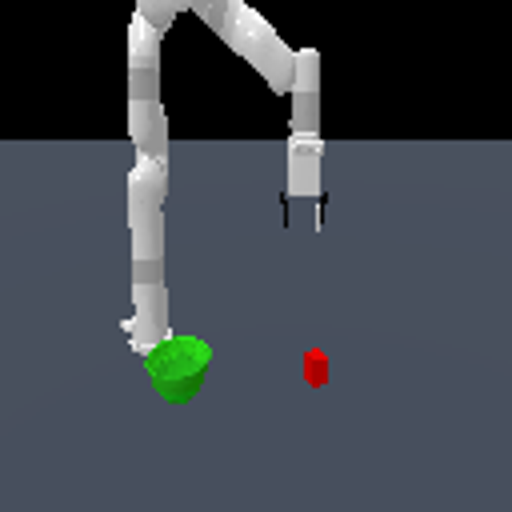

In [7]:
from PIL import Image
Image.fromarray(obs["image"]["front_camera"]["rgb"]).resize((512, 512))